In [1]:
from phagesvisual import *
from xaa_lib_immune import *
from tqdm import tqdm

## Single simulation

1936 1887


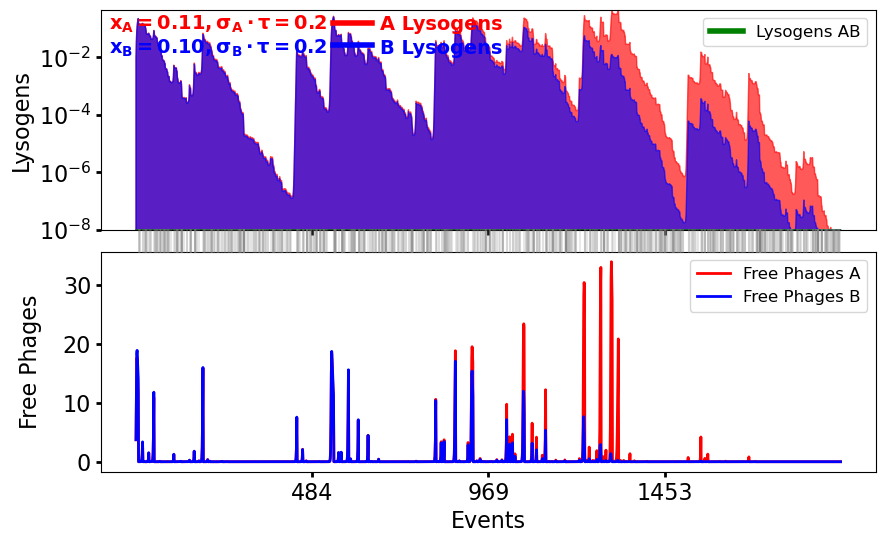

In [95]:
xa = 0.11
xaa = 0.11

xb = 0.1
xbb = 0.1

iterations = 10 ** 4
seed = np.random.rand(iterations)
seed[0] = 1
# Fixed parameters
sa = 2 * 10**(-4)
sb = 2 * 10**(-4)
iterations = 10**4
cutoff = 10**(-9)
p = 0.3
omega = 50
delta = 0
tbad = 10**3
## Calling the function
ha, hb, hfa, hfb, tbad_list, a_death, b_death = xaavsxbb_im(xa, xaa, sa, xb, xbb, sb, p, omega, tbad, seed, cutoff)
print(a_death, b_death)

hab = np.zeros(max(len(ha), len(hb)))

plot_2(ha, hb, hab, hfa, hfb, omega, p, tbad_list, xa, sa, xb, sb, scale=1, seed = seed[0:max(len(ha), len(hb))])

In [19]:
print(tbad_list[a_death-5:a_death+1])

[   0 2324    0    0    0 5340]


In [9]:
print("Agent A (xa, xaa, sa)", xa,",",xaa,",",sa)
print("Agent b (xb, xbb, sb)", xb,",",xbb,",",sb)

Agent A (xa, xaa, sa) 0.05 , 0.05 , 0.0038
Agent b (xb, xbb, sb) 0.05 , 0.05 , 0.0038


## Single Line Search

9it [00:03,  2.65it/s]


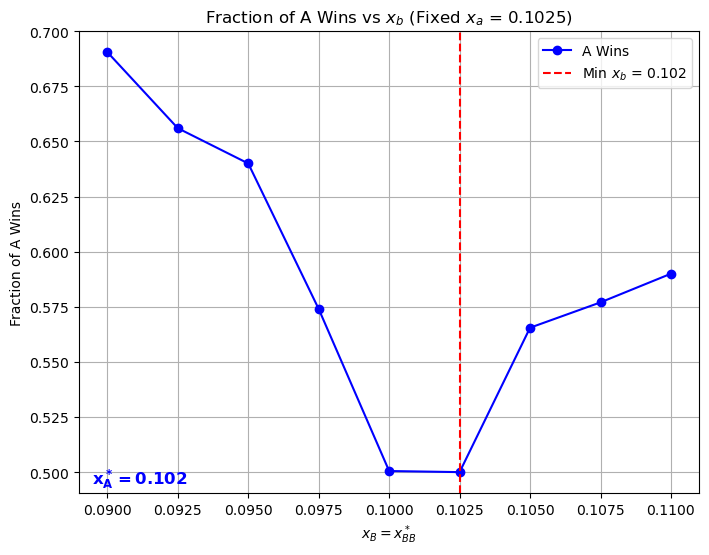

In [40]:
# Fixed parameters
sa = sb = 0.4e-4
omega = 50  # Fixed value
p = 0.3 # Fixed value
tbad = 1000  # Fixed value
cutoff = 1e-9  # Extinction threshold
iterations = 5 * 10 ** 3
num_simulations =  10 ** 3  # Number of simulations for statistics
xa_fixed = 0.1025 # Fix xa

# Varying xb values
xb_values = np.linspace(0.09, 0.11, 9)  # Adjust range as needed

# Results array to store a_wins
a_wins = np.zeros(len(xb_values))



# Simulation loop
for j, xb in tqdm(enumerate(xb_values)):
    a_win_count = 0  # Initialize counter for A wins
    for _ in range(num_simulations):
        # Generate new seed for each simulation
        seed = np.random.rand(iterations)
        seed[0] = 1
        xaa, xbb = xa_fixed, xb  # Constraint with fixed xa

        # Run the simulation
        _, _, _, _, _, death_a, death_b = xaavsxbb_im(xa_fixed, xaa, sa, xb, xbb, sb, p, omega, tbad, seed, cutoff)

        # Determine xawinner and update a_wins
        if death_a < death_b:
            continue  # B wins, no change to A's score
        elif death_b < death_a:
            a_win_count += 1  # A wins
        else:
            a_win_count += 0.5  # Draw

    # Record the fraction of A wins for this xb
    a_wins[j] = a_win_count / num_simulations




# Find the xb value that minimizes a_wins
min_index = np.argmin(a_wins)
xb_min = xb_values[min_index]

# Adding annotation in blue bold letters with the value of xa_fixed in the bottom left corner
plt.figure(figsize=(8, 6))
plt.plot(xb_values, a_wins, marker='o', linestyle='-', color='blue', label='A Wins')
plt.axvline(x=xb_min, color='red', linestyle='--', label=f'Min $x_b$ = {xb_min:.3f}')
plt.xlabel('$x_B = x^*_{BB}$')
plt.ylabel('Fraction of A Wins')
plt.title(f'Fraction of A Wins vs $x_b$ (Fixed $x_a$ = {xa_fixed})')
plt.grid(True)
plt.legend()

# Adding the annotation in the bottom left corner with the numerical value of xa_fixed
plt.text(0.02, 0.02, fr"$\mathbf{{x^*_A = {xa_fixed:.3f}}}$", fontsize=12, color='blue', weight='bold', transform=plt.gca().transAxes)

plt.show()



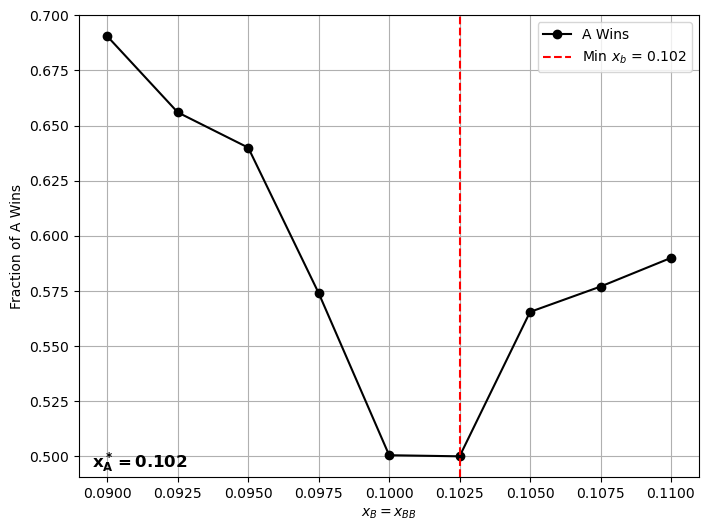

In [44]:
# Adding annotation in blue bold letters with the value of xa_fixed in the bottom left corner
plt.figure(figsize=(8, 6))
plt.plot(xb_values, a_wins, marker='o', linestyle='-', color='black', label='A Wins')
plt.axvline(x=xb_min, color='red', linestyle='--', label=f'Min $x_b$ = {xb_min:.3f}')
plt.xlabel('$x_B = x_{BB}$')
plt.ylabel('Fraction of A Wins')
plt.grid(True)
plt.legend()

# Adding the annotation in the bottom left corner with the numerical value of xa_fixed
plt.text(0.02, 0.02, fr"$\mathbf{{x^*_A = {xa_fixed:.3f}}}$", fontsize=12, color='black', weight='bold', transform=plt.gca().transAxes)

plt.show()

## Making Mutual Imunity Heatmaps

Starting simulations...


31it [00:24,  1.28it/s]

Time taken to create the simulation: 24.168847 seconds.


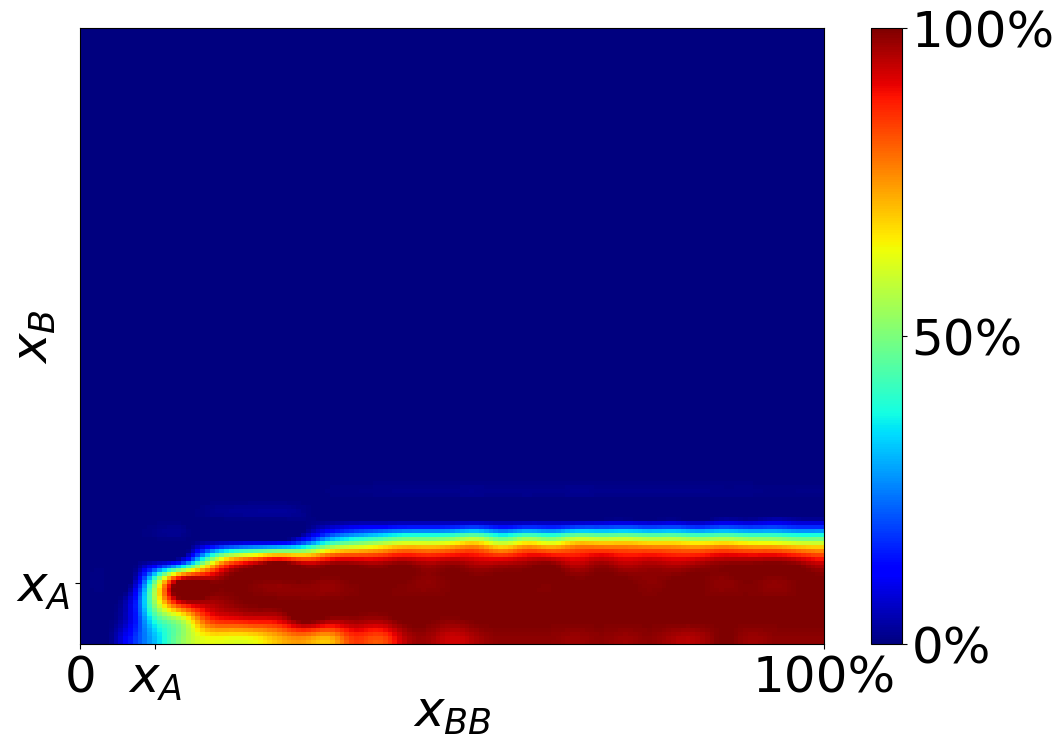

In [46]:
import time
from tqdm import tqdm

@njit
def simulate_two_agents(xa, xaa, sa, sb, xb, xbb, iterations, cutoff, p, omega, tbad, runs):
    """
    Simulates many fights between two agents with fixed xb and xbb values.
    """
    fights = 0
    wins_a = 0
    wins_b = 0

    for _ in range(runs):
        seed = np.random.rand(iterations)
        _, _, _, _, _, death_a, death_b = xaavsxbb_im(xa, xaa, sa, xb, xbb, sb, p, omega, tbad, seed, cutoff)

        # Count wins and fights
        if death_a != iterations and death_b > death_a + 10:
            wins_b += 1
            fights += 1
        elif death_b != iterations and death_a > death_b + 10:
            wins_a += 1
            fights += 1
        elif death_a == death_b and (death_b > 10 or death_a > 10):
            wins_b += 0.5
            wins_a += 0.5
            fights += 1  # No result

    # Calculate winning percentages
    win_percentage_a = wins_a / (fights + 10 ** (-12))
    win_percentage_b = wins_b / (fights + 10 ** (-12))

    return {
        "win_percentage_a": win_percentage_a,
        "win_percentage_b": win_percentage_b,
        "fights": fights
    }

# Parameters for Agent A (fixed)
xa = 0.1
xaa = 0.1
sa = 0.4 * 10 ** (-4)
sb = 0.4 * 10 ** (-4)

# Parameters for Agent B (varied)
xb_values = np.linspace(0,1,31)
xbb_values = np.linspace(0,1,31)
# Simulation parameters
iterations = 5 * 10 ** 3
cutoff = 10 ** (-9)
p = 0.3
omega = 50
tbad = 10 ** 3
runs = 10 ** 2  # Reduce runs for faster testing

# Store results
results_grid_b = np.zeros((len(xb_values), len(xbb_values)))
start_time = time.time()
# Run simulations for all combinations of xb and xbb
print("Starting simulations...")
for i, xb in tqdm(enumerate(xb_values)):
    for j, xbb in enumerate(xbb_values):
        results = simulate_two_agents(xa, xaa, sa, sb, xb, xbb, iterations, cutoff, p, omega, tbad, runs)
        # Store Agent B's win percentage
        results_grid_b[i, j] = results['win_percentage_b']
end_time = time.time()
time = end_time - start_time
print(f"Time taken to create the simulation: {time:.6f} seconds.")
# Display results
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
import numpy as np

# Assuming `results_grid_b`, `xbb_values`, `xb_values`, and `xa` are already defined

# Perform smoothing by interpolating the grid
zoom_factor = 5  # Increase the resolution by this factor
smoothed_grid = zoom(results_grid_b, zoom_factor, order=3)  # Cubic interpolation

# Normalize the smoothed grid to match the colorbar range [0, 1]
global_min = 0  # Force minimum to 0%
global_max = 1  # Force maximum to 100%
normalized_grid = (smoothed_grid - global_min) / (global_max - global_min)

# Create new axis values corresponding to the smoothed grid
fine_xbb = np.linspace(xbb_values[0], xbb_values[-1], smoothed_grid.shape[1])
fine_xb = np.linspace(0, 1, smoothed_grid.shape[0])  # Set xb range explicitly from 0 to 1

# Plot the normalized grid
plt.figure(figsize=(12, 8))
plt.imshow(normalized_grid, extent=[fine_xbb[0], fine_xbb[-1], fine_xb[0], fine_xb[-1]],
           origin='lower', aspect='auto', cmap='jet', vmin=0, vmax=1)

cbar = plt.colorbar()
cbar.set_ticks([0, 0.5, 1])  # Set ticks at 0%, 50%, and 100%
cbar.set_ticklabels(["0%", "50%", "100%"])  # Custom labels for the colorbar
cbar.ax.tick_params(labelsize=36)  # Set fontsize for colorbar ticks

# Add axis labels
plt.xlabel("$x_{BB}$", fontsize=36, labelpad =-10)
plt.ylabel("$x_B$", fontsize=36, labelpad =-30)

# Add custom ticks on the y-axis, including `xa`
ax = plt.gca()
y_ticks = [ xa]  # Include 0, xa, and 1
y_labels = ["$x_A$"]  # Add custom label for xa
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=36)

# Add custom ticks on the x-axis
x_ticks = [0, xa, 1]  # Include 0, xa, and 1
x_labels = ["0", "$x_A$", "100%"]  # Add custom label for xa
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, fontsize=36)

plt.show()


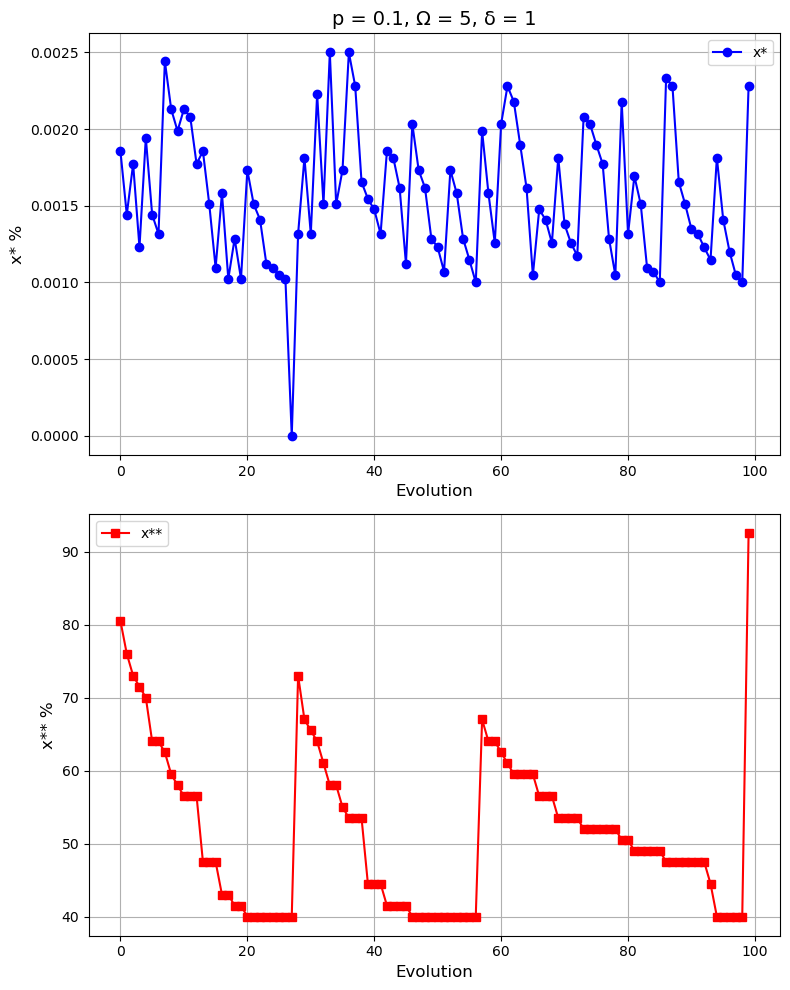

Computation completed in 5258.31 seconds.
Plotting completed in 0.23 seconds.


In [5]:
# Parameters
xa = 0.0001
xaa = 0.33
sa = 40 * 10 ** (-4)
sb = sa
iterations = 5 * 10 ** 3
cutoff = 10 ** (-9)
p = 0.1
omega = 5
delta = 0
tbad = 10 ** 3
steps = 100      ### evolution steps
games = 10 ** 3  ## Testing fights
conf = 0.52

#xb_values = np.logspace(-4, -1, 11)  # From 0.001 to 0.1 in 21 points
#xbb_values = np.logspace(-4, -1, 11)  # From 0.001 to 0.1 in 21 points

xb_values = np.concatenate(([0],np.logspace(-5,np.log10(xa/4), 41)))
xbb_values = np.linspace(0.4,1,41)

# Measure computation time
start_time = time.time()

# Run the computation
xa_evolution, xaa_evolution, step_completed = compute_iterations(
    xa, xaa, sa, sb, xb_values, xbb_values, iterations, cutoff, p, omega, tbad, steps, games, conf
)

# Measure elapsed time for computation
computation_time = time.time() - start_time

# Plot the results
plot_start_time = time.time()

plot_evolution(xa_evolution, xaa_evolution, step_completed, p, omega)
plot_time = time.time() - plot_start_time

# Print timing information
print(f"Computation completed in {computation_time:.2f} seconds.")
print(f"Plotting completed in {plot_time:.2f} seconds.")




In [6]:
print(len(xa_evolution))
print(xaa_evolution)

100
[47.5 47.5 46.  46.  41.5 41.5 40.  40.  53.5 53.5 43.  43.  43.  40.
 40.  40.  40.  40.  40.  43.  43.  43.  43.  43.  43.  41.5 41.5 41.5
 41.5 41.5 41.5 40.  40.  40.  76.  76.  52.  52.  52.  50.5 46.  46.
 43.  43.  40.  40.  40.  40.  40.  73.  43.  43.  41.5 41.5 41.5 40.
 40.  40.  40.  40.  40.  46.  46.  46.  46.  43.  43.  43.  43.  43.
 43.  40.  40.  40.  40.  40.  68.5 65.5 41.5 41.5 41.5 41.5 41.5 41.5
 40.  40.  56.5 47.5 47.5 47.5 43.  40.  40.  40.  40.  40.  50.5 43.
 43.  43. ]


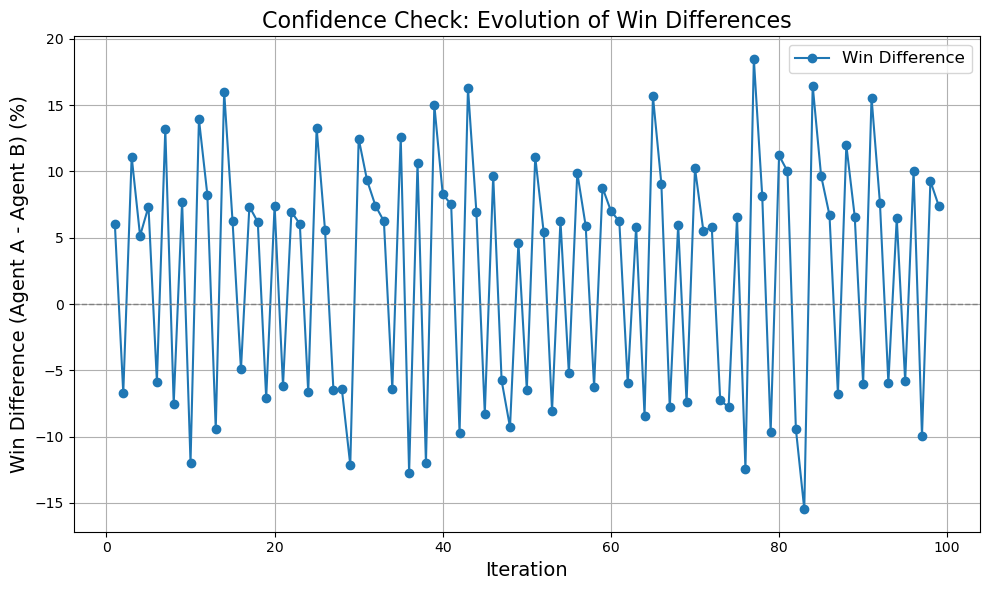

In [9]:

@njit
def simulate_two_agents_im(xa, xaa, sa, sb, xb, xbb, iterations, cutoff, p, omega, tbad, runs):
    """
    Simulates many fights between two agents with fixed xb and xbb values.
    """
    fights = 0
    wins_a = 0
    wins_b = 0

    for _ in range(runs):
        seed = np.random.rand(iterations)
        seed[0] = 1
        _, _, _, _, _, a_death, b_death = xaavsxbb_im(
                        xa, xaa, sa, xb, xbb, sb, p, omega, tbad, seed, cutoff
                    )

        # Count wins and fights
        if a_death != iterations and b_death > a_death + 10:
            wins_b += 1
            fights += 1
        elif b_death != iterations and a_death > b_death + 10:
            wins_a += 1
            fights += 1

        elif a_death == b_death and (b_death > 10 or a_death > 10):
            wins_a += 0.5
            wins_b += 0.5
            fights += 1

    # Calculate winning percentages
    win_percentage_a = wins_a / (fights + 10 ** (-12))
    win_percentage_b = wins_b / (fights + 10 ** (-12))

    return win_percentage_a, win_percentage_b


def confidence_check(xa_evolution, xaa_evolution, sa, sb, iterations, cutoff, p, omega, tbad, runs):
    """
    Performs the Confidence Check algorithm and plots win differences.
    """
    win_differences = []

    # Initialize the first pair of agents
    

    for i in range(len(xa_evolution)-1):
        xa = xa_evolution[i] / 100
        xaa = xaa_evolution[i] / 100
        # Get the next agent
        xb = xa_evolution[i+1] / 100
        xbb = xaa_evolution[i+1] / 100

        # Simulate the fight between agents
        win_percentage_a, win_percentage_b = simulate_two_agents_im(
            xa, xaa, sa, sb, xb, xbb, iterations, cutoff, p, omega, tbad, runs
        )

        # Calculate win difference
        win_difference = (win_percentage_b - win_percentage_a) * 100  # Convert to percent
        win_differences.append(win_difference)

        # Update xa and xaa for the next iteration
        xa, xaa = xb, xbb

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(xa_evolution)), win_differences, marker='o', linestyle='-', label="Win Difference")
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.xlabel("Iteration", fontsize=14)
    plt.ylabel("Win Difference (Agent A - Agent B) (%)", fontsize=14)
    plt.title("Confidence Check: Evolution of Win Differences", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


sa = 40 * 10 ** (-4)
sb = sa
iterations = 10 ** 4
cutoff = 10 ** (-9)
p = 0.1
omega = 5
tbad = 10 ** 3
runs = 10 ** 4  # Number of battles per pair

# Run Confidence Check
confidence_check(xa_evolution, xaa_evolution, sa, sb, iterations, cutoff, p, omega, tbad, runs)

In [17]:
print(xa_evolution[-5])

0.0


### Doing a confidence check on the updates